In [5]:
import numpy as np
import pandas as pd

try:
    dt=np.dtype([('x', 'f'), ('y', 'f'), ('z', 'f'), ('pdf', 'f')])
    data=np.fromfile("./loc/global.19050404.005224.grid0.loc.scat", dtype=dt)
    df=pd.DataFrame(data)
    df=df.iloc[1: , :]
    print(df)
except IOError:
    print("Error while opening the file!")

              x          y          z         pdf
1     75.262421  31.544361  14.450377  202.654373
2     75.256317  31.552944  15.104315  202.654373
3     75.318802  31.381878  18.789495  202.653809
4     75.259583  31.380777  19.739565  202.653809
5     77.149925  32.988205  22.579704  200.593155
...         ...        ...        ...         ...
9934  76.459297  33.034081  65.500336  195.930588
9935  74.844521  32.192554   7.440091  195.739792
9936  75.335060  30.539297  87.200371  195.733383
9937  74.741371  31.125612  72.525696  195.515198
9938  74.721252  32.248962   9.149812  191.843338

[9938 rows x 4 columns]


In [25]:
from scipy.io import loadmat

locs=pd.read_csv('1905Kangra.csv')
loc1=locs.iloc[0:-1, :]
loc2=locs.iloc[-1:]
staloc=pd.read_csv("./loc/last.stations",header=None, sep=' ')

region = [75, 78, 31, 34 ]
topo_data = "@earth_relief_01s" #01s
flt = loadmat('/home/vipin/Documents/GIS2000.mat')

In [26]:
import pygmt

fig = pygmt.Figure()

# pygmt.makecpt(cmap="gray", series=[-8000, 8000])

fig.grdimage(
    grid=topo_data,
    region=region,
    projection='M15c',
    shading=True,
    frame=True,
    cmap=True
)

fig.basemap(
    region=region, 
    projection="M15c", 
    frame=True
)

fig.coast(
    water='white',
    # borders='1/1p',
    shorelines=True
)

fig.plot(
    x=flt['x'][0],
    y=flt['y'][0],
    pen="1p,red"
)

fig.plot(
    x=df.x,
    y=df.y,
    color=df.pdf,
    #cmap=True,
    style="c0.02",
    pen="magenta"
)

fig.plot(
    x=loc1.Longitude,
    y=loc1.Latitude,
    style="a0.6",
    color='blue'
)
fig.plot(
    x=loc2.Longitude,
    y=loc2.Latitude,
    style="a0.6",
    color='cyan'
)

fig.text(
    x=locs.Longitude,
    y=locs.Latitude-0.1,
    font="10p,Helvetica,black",
    text=locs.Author
)

with fig.inset(position="jBR+w3c/3c+o0.1c", box="+gwhite+p1p"):
    pygmt.makecpt(cmap="geo", series=[-8000, 8000])
    fig.grdimage(
        grid=topo_data,
        region=[region[0]-5, region[1]+5, region[2]-5, region[3]+5],
        projection='M3c',
        shading=True,
        frame=True,
        cmap=False
    )
    fig.coast(
        region=[region[0]-5, region[1]+5, region[2]-5, region[3]+5],
        projection="M3c",
        # borders=[1, 2],
        shorelines="1/thin",
        water="white",
        # Use dcw to selectively highlight an area
        dcw="US.MA+gred",
    )
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, projection="M3c", style="r+s", pen="1p,red")
fig.show()

plot [WARNING]: Your data array row 78 contains NaNs - no resampling taken place!
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 1x1 arc seconds tiles provided by SRTMGL1 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_01s_g): N26E070
psconvert [ERROR]: System call [gs -q -dNOSAFER -dNOPAUSE -dBATCH -sDEVICE=bbox -DPSL_no_pagefill -dMaxBitmap=2147483647 -dUseFastColor=true '/home/vipin/.gmt/sessions/gmt_session.1041930/gmt_21.ps-' 2> '/home/vipin/.gmt/sessions/gmt_session.1041930/psconvert_1041930c.bb'] returned error 256.


Error: /limitcheck in /----nostringval----
Operand stack:

Execution stack:
   %interp_exit   .runexec2   --nostringval--   --nostringval--   --nostringval--   2   %stopped_push   --nostringval--   --nostringval--   --nostringval--   false   1   %stopped_push   1974   1   3   %oparray_pop   1973   1   3   %oparray_pop   1961   1   3   %oparray_pop   1817   1   3   %oparray_pop   --nostringval--   %errorexec_pop   .runexec2   --nostringval--   --nostringval--   --nostringval--   2   %stopped_push
Dictionary stack:
   --dict:735/1123(ro)(G)--   --dict:0/20(G)--   --dict:75/200(L)--   --dict:161/250(L)--
Current allocation mode is local
Last OS error: No such file or directory


GMTCLibError: Module 'psconvert' failed with status code 79:
psconvert [ERROR]: System call [gs -q -dNOSAFER -dNOPAUSE -dBATCH -sDEVICE=bbox -DPSL_no_pagefill -dMaxBitmap=2147483647 -dUseFastColor=true '/home/vipin/.gmt/sessions/gmt_session.1041930/gmt_21.ps-' 2> '/home/vipin/.gmt/sessions/gmt_session.1041930/psconvert_1041930c.bb'] returned error 256.

In [4]:
import pygmt    
fig.grdimage(
    grid=topo_data,
    region=[region[0]-2, region[1]+2, region[2]-2.5, region[3]+1.5],
    projection='M15c',
    shading=True,
    frame=True,
    cmap=False
)
fig.coast(
    region=[region[0]-2, region[1]+2, region[2]-2.5, region[3]+1.5],
    projection="M15c",
    # borders=[1, 2],
    shorelines="1/thin",
    water="white",
    # Use dcw to selectively highlight an area
    dcw="US.MA+gred",
)
rectangle = [[region[0], region[2], region[1], region[3]]]
fig.plot(data=rectangle, projection="M15c", style="r+s", pen="1p,red")me="g", land="white", water="skyblue")
fig.plot(
    x=staloc[1],
    y=staloc[2],
    style="i0.1",
    color="red",
    pen="0.001p,black"
)

fig.plot(
    x=loc2.Longitude,
    y=loc2.Latitude,
    style="a0.3",
    color='blue'
)

fig.show()

coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (-0/0) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 258 degrees.


In [3]:
locs=locs[["Date", "Time", "Latitude", "Longitude", "Depth", "Author" ]]
locs.to_csv("1905Kangra-loc.csv", index=False)

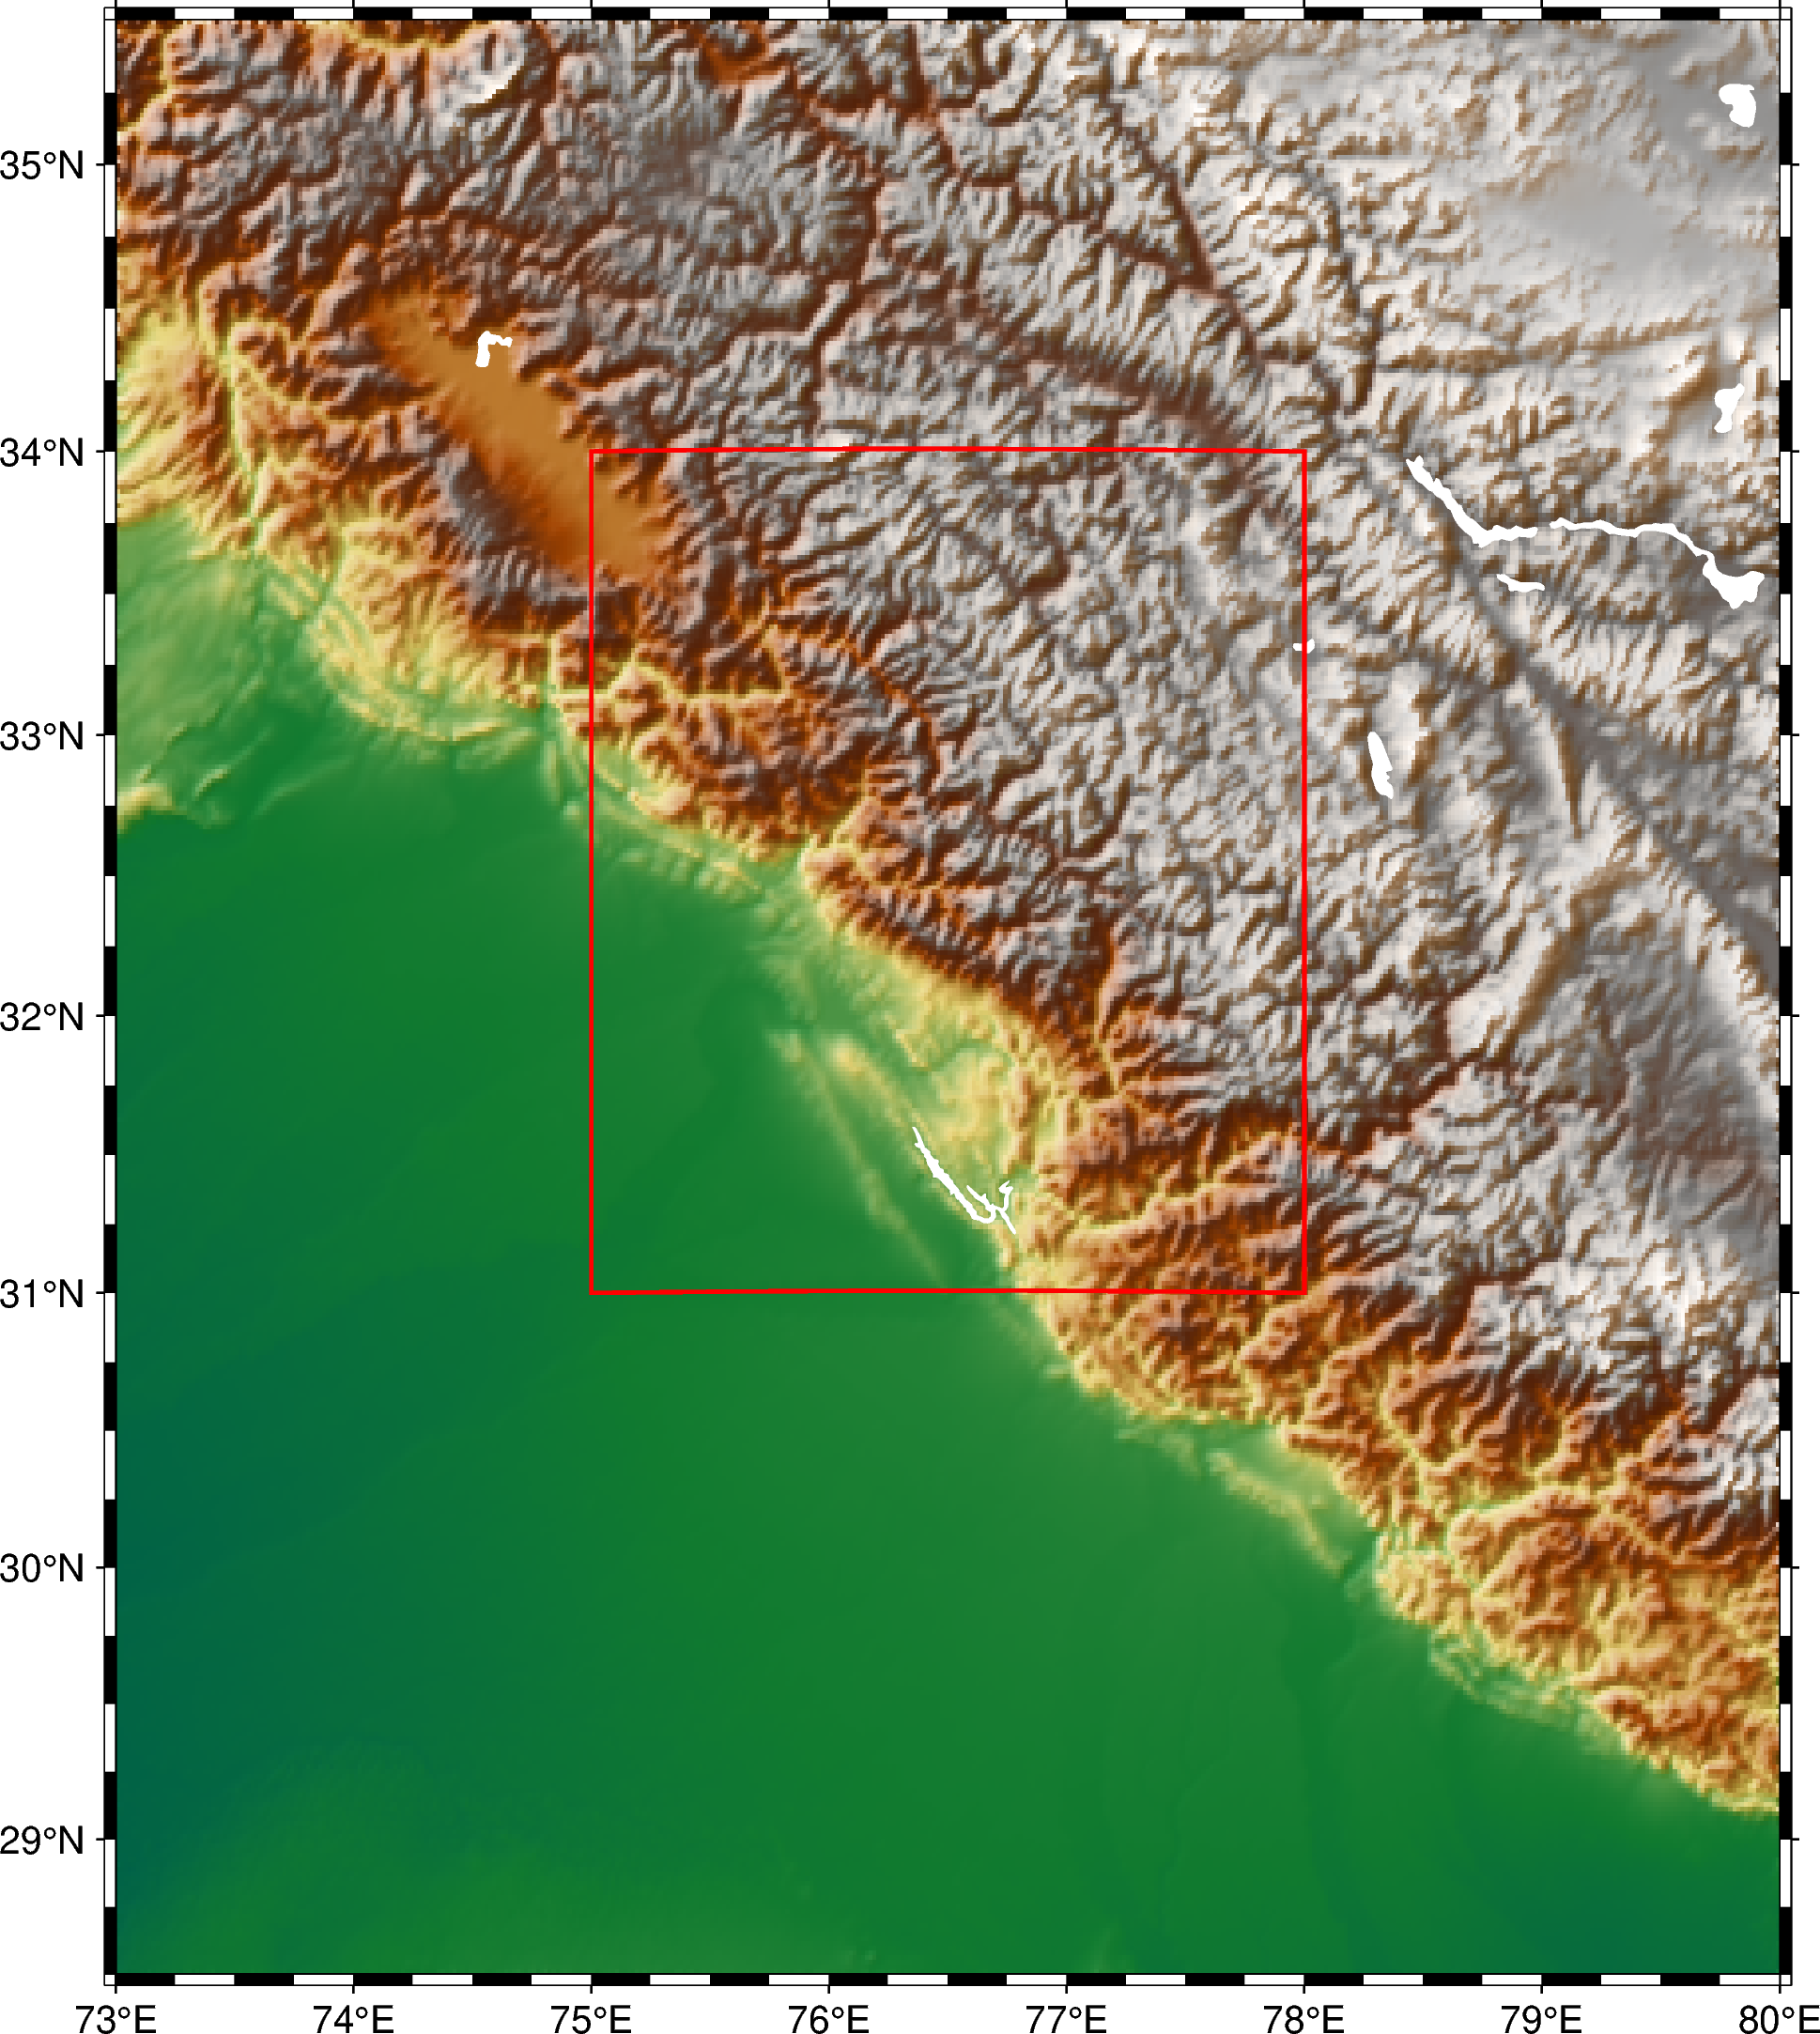

In [18]:
fig = pygmt.Figure()
fig.grdimage(
    grid=topo_data,
    region=[region[0]-2, region[1]+2, region[2]-2.5, region[3]+1.5],
    projection='M15c',
    shading=True,
    frame=True,
    cmap=False
)
fig.coast(
    region=[region[0]-2, region[1]+2, region[2]-2.5, region[3]+1.5],
    projection="M15c",
    # borders=[1, 2],
    shorelines="1/thin",
    water="white",
    # Use dcw to selectively highlight an area
    dcw="US.MA+gred",
)
rectangle = [[region[0], region[2], region[1], region[3]]]
fig.plot(data=rectangle, projection="M15c", style="r+s", pen="1p,red")
fig.show()